In [49]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=500, random_state=42)
print(X.shape, y.shape)

(1000, 500) (1000,)


In [50]:
X

array([[ 1.12465652,  1.47755484, -0.76589679, ..., -0.56040493,
        -1.36103985,  1.65839723],
       [ 0.36668165, -1.10794208, -0.45756445, ...,  0.20233552,
        -1.18862788, -0.91957669],
       [-0.61600782, -1.28028683,  0.53219845, ...,  0.52195906,
         0.14587233, -0.01263937],
       ...,
       [ 0.21967654, -0.21410377, -0.41445045, ..., -1.24209409,
        -0.36848889,  1.25453839],
       [-0.32201197,  0.16208569,  0.48190163, ..., -0.11040116,
         0.33122276,  0.31912084],
       [-0.13738884, -1.36347936,  1.03924293, ..., -2.13642978,
        -0.39537547, -0.70023287]])

In [ ]:
import pandas
data = pandas.read_csv("data.csv")[:500]
X, y = data.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1), data.diagnosis
print(X.shape, y.shape)

(500, 30) (500,)


In [30]:
import pandas
data = pandas.read_excel("data2.xlsx")
X, y = data.drop(['Patient Id', 'Level'], axis=1), data.Level
print(X.shape, y.shape)

(1000, 23) (1000,)


In [44]:
data

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P995,44,1,6,7,7,7,7,6,7,...,5,3,2,7,8,2,4,5,3,High
996,P996,37,2,6,8,7,7,7,6,7,...,9,6,5,7,2,4,3,1,4,High
997,P997,25,2,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
998,P998,18,2,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, )

(800, 500) (800,) (200, 500) (200,)


In [52]:
from pandas.core.common import random_state
import sklearn.naive_bayes
import sklearn.linear_model
from sklearn.metrics import (classification_report, confusion_matrix, 
                             accuracy_score, f1_score)
models = [
    sklearn.naive_bayes.GaussianNB(),
    sklearn.naive_bayes.BernoulliNB(),
    sklearn.linear_model.RidgeClassifier(random_state=42),
]
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f'\nModel: \t{model}')
    #print(confusion_matrix(y_test,y_pred))
    #print(classification_report(y_test,y_pred))
    print(f'accuracy: {accuracy_score(y_test, y_pred)}, f1: {f1_score(y_test, y_pred, average="weighted")}')


Model: 	GaussianNB()
accuracy: 0.785, f1: 0.7848870995974094

Model: 	BernoulliNB()
accuracy: 0.83, f1: 0.82994899489949

Model: 	RidgeClassifier(random_state=42)
accuracy: 0.735, f1: 0.7347016885553469


In [53]:
from sklearn.model_selection import learning_curve

train_size_abs, train_scores, test_scores = learning_curve(
    sklearn.naive_bayes.GaussianNB(), X, y, train_sizes=[0.01, 0.1, 0.3, 0.6, 0.9],
    scoring='accuracy'
)
print('train_size', *train_size_abs, sep='\n')
test_scores

train_size
8
80
240
480
720


array([[0.5  , 0.57 , 0.56 , 0.505, 0.525],
       [0.67 , 0.7  , 0.735, 0.725, 0.705],
       [0.725, 0.745, 0.74 , 0.735, 0.725],
       [0.785, 0.78 , 0.79 , 0.82 , 0.755],
       [0.795, 0.8  , 0.79 , 0.835, 0.725]])

In [54]:
import numpy as np
sampling_coefficients = list(np.linspace(1, 0, 100, False))[1:]
sampling_coefficients[:5], sampling_coefficients[-5:], 

([0.99, 0.98, 0.97, 0.96, 0.95],
 [0.04999999999999993,
  0.040000000000000036,
  0.030000000000000027,
  0.020000000000000018,
  0.010000000000000009])

In [55]:
results = []
for sc in sampling_coefficients:
    print(f'\t\t {sc}')
    iter_res = [0] * (2 * len(models) + 1)
    X_sample, _, y_sample, _ = train_test_split(X_train, y_train, test_size=1-sc)
    iter_res[0] = X_sample.shape[0]
    print(f'Train dataset size: {X_sample.shape[0]}')
    i = -1
    for model in models:
        i += 2
        model.fit(X_sample, y_sample)
        y_pred = model.predict(X_test)
        # print(f'Model: \t{model} accuracy: {accuracy_score(y_test, y_pred)}, f1: {f1_score(y_test, y_pred, average="weighted")}')
        iter_res[i] = accuracy_score(y_test, y_pred)
        iter_res[i+1] = f1_score(y_test, y_pred, average="weighted")
    print(iter_res)
    results.append(iter_res)
print(results)

		 0.99
Train dataset size: 791
[791, 0.795, 0.7949743743593589, 0.83, 0.82994899489949, 0.74, 0.7396096486838155]
		 0.98
Train dataset size: 783
[783, 0.785, 0.7848870995974094, 0.84, 0.8399519951995199, 0.715, 0.7149643741093529]
		 0.97
Train dataset size: 775
[775, 0.785, 0.7848870995974094, 0.835, 0.834979374484362, 0.725, 0.7248555925083144]
		 0.96
Train dataset size: 767
[767, 0.8, 0.799699729756781, 0.835, 0.834979374484362, 0.725, 0.7246904315196997]
		 0.95
Train dataset size: 759
[759, 0.78, 0.78, 0.84, 0.8399519951995199, 0.715, 0.7148503413267986]
		 0.94
Train dataset size: 751
[751, 0.8, 0.7995192307692307, 0.82, 0.82, 0.69, 0.6892548076923076]
		 0.9299999999999999
Train dataset size: 743
[743, 0.805, 0.804624164601637, 0.835, 0.8349133555049886, 0.725, 0.7248555925083144]
		 0.92
Train dataset size: 736
[736, 0.775, 0.7749718742968574, 0.83, 0.82994899489949, 0.73, 0.72991899189919]
		 0.91
Train dataset size: 728
[728, 0.795, 0.7947692307692307, 0.835, 0.83501237530

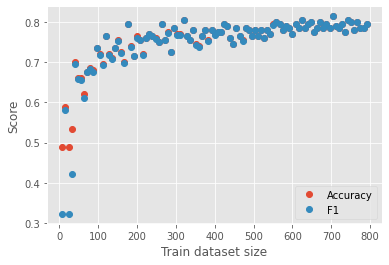

In [58]:
import matplotlib.pyplot as plt
results = np.array(results)
plt.style.use('ggplot')
plt.plot(results[:, 0], results[:, 1], 'o', label = 'Accuracy')
plt.plot(results[:, 0], results[:, 2], 'o', label = 'F1')
plt.ylabel('Score')
plt.xlabel('Train dataset size')
plt.legend()
plt.show()

In [62]:
results = []
for sc in sampling_coefficients:
    print(f'\t\t {sc}')
    iter_res = [0] * (2 * len(models) + 1)
    sample_indices = np.random.binomial(n=1, p=sc, size=X_train.shape[0])
    # print(sum(sample_indices))
    X_sample, y_sample = X_train[sample_indices==1], y_train[sample_indices==1]
    iter_res[0] = X_sample.shape[0]
    print(f'Train dataset size: {X_sample.shape[0]}')
    i = -1
    for model in models:
        i += 2
        model.fit(X_sample, y_sample)
        y_pred = model.predict(X_test)
        # print(f'Model: \t{model} accuracy: {accuracy_score(y_test, y_pred)}, f1: {f1_score(y_test, y_pred, average="weighted")}')
        iter_res[i] = accuracy_score(y_test, y_pred)
        iter_res[i+1] = f1_score(y_test, y_pred, average="weighted")
    print(iter_res)
    results.append(iter_res)
print(results)

		 0.99
Train dataset size: 790
[790, 0.78, 0.7798239295718287, 0.825, 0.8249781244531113, 0.725, 0.7246904315196997]
		 0.98
Train dataset size: 780
[780, 0.795, 0.7948923507789253, 0.825, 0.8249781244531113, 0.71, 0.7095646081473325]
		 0.97
Train dataset size: 778
[778, 0.785, 0.7848870995974094, 0.835, 0.834979374484362, 0.755, 0.7547242026266416]
		 0.96
Train dataset size: 762
[762, 0.8, 0.7999399939994, 0.835, 0.8349133555049886, 0.72, 0.7197759103641458]
		 0.95
Train dataset size: 755
[755, 0.785, 0.7848870995974094, 0.83, 0.82994899489949, 0.71, 0.7097679071628652]
		 0.94
Train dataset size: 751
[751, 0.79, 0.7899369936993699, 0.83, 0.8300000000000003, 0.695, 0.6948398389637669]
		 0.9299999999999999
Train dataset size: 737
[737, 0.805, 0.8049756243906097, 0.835, 0.834979374484362, 0.75, 0.7496246621959765]
		 0.92
Train dataset size: 738
[738, 0.8, 0.7998399359743896, 0.825, 0.8250131253281332, 0.7, 0.6989473684210527]
		 0.91
Train dataset size: 719
[719, 0.79, 0.789831932

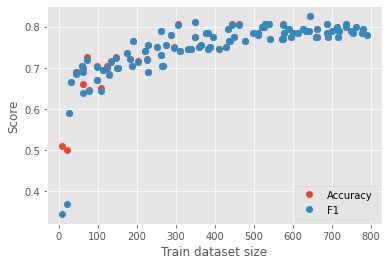

In [63]:
import matplotlib.pyplot as plt
results = np.array(results)
plt.style.use('ggplot')
plt.plot(results[:, 0], results[:, 1], 'o', label = 'Accuracy')
plt.plot(results[:, 0], results[:, 2], 'o', label = 'F1')
plt.ylabel('Score')
plt.xlabel('Train dataset size')
plt.legend()
plt.show()

In [66]:
results = []
for sc in sampling_coefficients:
    print(f'\t\t {sc}')
    a = int(1 / sc) #  interval length
    r = np.random.randint(0, a)  #  init index
    print(f'{a=}, {r=}')
    sample_indices = np.zeros(X_train.shape[0])
    sample_indices[r::a] = 1
    X_sample, y_sample = X_train[sample_indices==1], y_train[sample_indices==1]
    print(f'Train dataset size: {X_sample.shape[0]}')
    iter_res = [0] * (2 * len(models) + 1)
    iter_res[0] = X_sample.shape[0]
    i = -1
    for model in models:
        i += 2
        model.fit(X_sample, y_sample)
        y_pred = model.predict(X_test)
        # print(f'Model: \t{model} accuracy: {accuracy_score(y_test, y_pred)}, f1: {f1_score(y_test, y_pred, average="weighted")}')
        iter_res[i] = accuracy_score(y_test, y_pred)
        iter_res[i+1] = f1_score(y_test, y_pred, average="weighted")
    print(iter_res)
    results.append(iter_res)
print(results)

		 0.99
a=1, r=0
Train dataset size: 800
[800, 0.785, 0.7848870995974094, 0.83, 0.82994899489949, 0.735, 0.7347016885553469]
		 0.98
a=1, r=0
Train dataset size: 800
[800, 0.785, 0.7848870995974094, 0.83, 0.82994899489949, 0.735, 0.7347016885553469]
		 0.97
a=1, r=0
Train dataset size: 800
[800, 0.785, 0.7848870995974094, 0.83, 0.82994899489949, 0.735, 0.7347016885553469]
		 0.96
a=1, r=0
Train dataset size: 800
[800, 0.785, 0.7848870995974094, 0.83, 0.82994899489949, 0.735, 0.7347016885553469]
		 0.95
a=1, r=0
Train dataset size: 800
[800, 0.785, 0.7848870995974094, 0.83, 0.82994899489949, 0.735, 0.7347016885553469]
		 0.94
a=1, r=0
Train dataset size: 800
[800, 0.785, 0.7848870995974094, 0.83, 0.82994899489949, 0.735, 0.7347016885553469]
		 0.9299999999999999
a=1, r=0
Train dataset size: 800
[800, 0.785, 0.7848870995974094, 0.83, 0.82994899489949, 0.735, 0.7347016885553469]
		 0.92
a=1, r=0
Train dataset size: 800
[800, 0.785, 0.7848870995974094, 0.83, 0.82994899489949, 0.735, 0.7347

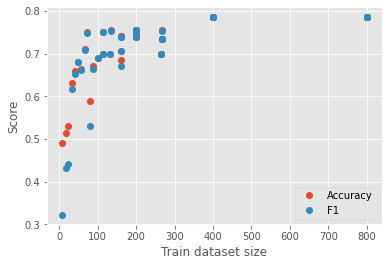

In [67]:
import matplotlib.pyplot as plt
results = np.array(results)
plt.style.use('ggplot')
plt.plot(results[:, 0], results[:, 1], 'o', label = 'Accuracy')
plt.plot(results[:, 0], results[:, 2], 'o', label = 'F1')
plt.ylabel('Score')
plt.xlabel('Train dataset size')
plt.legend()
plt.show()

In [64]:
results = []
old_sample_lengths = set()
for a in range(1, X_train.shape[0]):
    r = np.random.randint(0, a)  #  init index
    sample_indices = np.zeros(a)
    sample_indices[r] = 1
    sample_indices = np.resize(sample_indices, X_train.shape[0])
    X_sample, y_sample = X_train[sample_indices==1], y_train[sample_indices==1]

    if X_sample.shape[0] in old_sample_lengths: continue
    old_sample_lengths.add(X_sample.shape[0])

    print(f'\t\t {X_sample.shape[0] / X_train.shape[0]}')
    print(f'{a=}, {r=}')
    print(f'Train dataset size: {X_sample.shape[0]}')
    iter_res = [0] * (2 * len(models) + 1)
    iter_res[0] = X_sample.shape[0]
    i = -1
    for model in models:
        i += 2
        model.fit(X_sample, y_sample)
        y_pred = model.predict(X_test)
        # print(f'Model: \t{model} accuracy: {accuracy_score(y_test, y_pred)}, f1: {f1_score(y_test, y_pred, average="weighted")}')
        iter_res[i] = accuracy_score(y_test, y_pred)
        iter_res[i+1] = f1_score(y_test, y_pred, average="weighted")
    print(iter_res)
    results.append(iter_res)
print(results)

		 1.0
a=1, r=0
Train dataset size: 800
[800, 0.785, 0.7848870995974094, 0.83, 0.82994899489949, 0.735, 0.7347016885553469]
		 0.5
a=2, r=0
Train dataset size: 400
[400, 0.785, 0.7848870995974094, 0.825, 0.8249781244531113, 0.61, 0.6096875]
		 0.33375
a=3, r=1
Train dataset size: 267
[267, 0.735, 0.7349668542839274, 0.78, 0.7792262084212642, 0.69, 0.6900310031003101]
		 0.25
a=4, r=2
Train dataset size: 200
[200, 0.745, 0.7449681242031051, 0.8, 0.7998397435897435, 0.695, 0.6949618511569732]
		 0.2
a=5, r=4
Train dataset size: 160
[160, 0.72, 0.7095824720959074, 0.765, 0.7645470701609471, 0.68, 0.6745454545454546]
		 0.16625
a=6, r=5
Train dataset size: 133
[133, 0.7, 0.6992773986350863, 0.74, 0.7399219297367631, 0.68, 0.6797438975590236]
		 0.14375
a=7, r=1
Train dataset size: 115
[115, 0.76, 0.7596396757081374, 0.77, 0.7696546892202982, 0.73, 0.72991899189919]
		 0.125
a=8, r=7
Train dataset size: 100
[100, 0.675, 0.6689828647309686, 0.62, 0.6072663139329806, 0.68, 0.6788744849763844]

/usr/local/lib/python3.8/dist-packages/sklearn/naive_bayes.py:489: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
/usr/local/lib/python3.8/dist-packages/sklearn/naive_bayes.py:490: RuntimeWarning: divide by zero encountered in true_divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
/usr/local/lib/python3.8/dist-packages/sklearn/naive_bayes.py:490: RuntimeWarning: invalid value encountered in subtract
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)


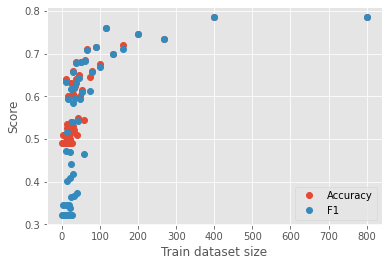

In [65]:
import matplotlib.pyplot as plt
results = np.array(results)
plt.style.use('ggplot')
plt.plot(results[:, 0], results[:, 1], 'o', label = 'Accuracy')
plt.plot(results[:, 0], results[:, 2], 'o', label = 'F1')
plt.ylabel('Score')
plt.xlabel('Train dataset size')
plt.legend()
plt.show()

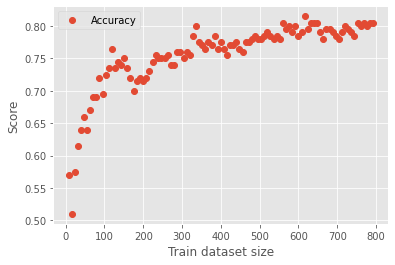

In [68]:
from sklearn.model_selection import learning_curve

train_size_abs, train_scores, test_scores = learning_curve(
    sklearn.naive_bayes.GaussianNB(), X, y, train_sizes=sampling_coefficients,
    scoring='accuracy'
)

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(train_size_abs, test_scores[:, 1], 'o', label = 'Accuracy')
# plt.plot(train_size_abs, test_scores[:, 1], 'o', label = 'F1')
plt.ylabel('Score')
plt.xlabel('Train dataset size')
plt.legend()
plt.show()